In [17]:
#Importação de módulos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [18]:
#Leitura da base de dados
base = pd.read_csv('house_prices.csv')
X = base.iloc[:, 3:19].values
y = base.iloc[:, 2:3].values

In [19]:
base

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [20]:
#Atributos previsores iniciando em bedrooms
X[0]

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  9.81780e+04,  4.75112e+01, -1.22257e+02])

In [21]:
#Variável alvo (price)
y[0]

array([221900.])

In [22]:
#Escalonamento de variáveis
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [23]:
#Divisão de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y.ravel(),
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [24]:
#Montagem da rede e treinamento
regressor = MLPRegressor(
                        hidden_layer_sizes = (9,9),
                        max_iter = 1000
                        )
regressor.fit(X_treinamento, y_treinamento)

MLPRegressor(hidden_layer_sizes=(9, 9), max_iter=1000)

<AxesSubplot:>

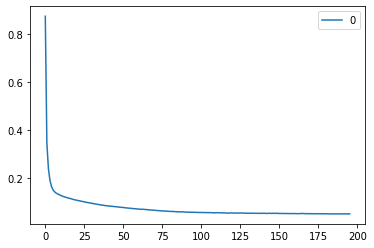

In [25]:
#Plotando a curva da função de perda
pd.DataFrame(regressor.loss_curve_).plot()

In [26]:
#Análise do score da base de treinamento
regressor.score(X_treinamento, y_treinamento)


0.8950153887859394

In [27]:
#Análise do score da base de teste - r²
regressor.score(X_teste, y_teste)



0.8840742854617707

In [28]:
#Erro Médio Absoluto
previsoes = regressor.predict(X_teste)
y_teste = scaler_y.inverse_transform(y_teste)
previsoes = scaler_y.inverse_transform(previsoes)
mae = mean_absolute_error(y_teste, previsoes)
mae

74971.00719455071

In [29]:
#Raiz do Erro Quadrático Médio - RMSE

test_set_rmse = np.sqrt(mean_squared_error(y_teste, previsoes))
print('RMSE: ', test_set_rmse)

RMSE:  126157.3128829125
